# Step 1: Import Dependencies

In [11]:
import datetime as dt
import pandas as pd
import numpy as np 
import pylab
import seaborn as sns
import scipy.stats as stats
from pandas_datareader import data as pdr
import plotly.offline as pyo
from nsetools import Nse
from nsepy import get_history

pyo.init_notebook_mode(connected=True)
pd.options.plotting.backend = 'plotly'

# Step 2: Get Stock Market Data

In [85]:
end = dt.datetime.now()
start = dt.datetime(2021, 6, 1)

#df = pdr.get_data_yahoo('CBA.AX', start, end)
df = get_history(symbol='TCS', start=start, end=end)
df.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-06-01,TCS,EQ,3159.15,3168.60,3169.95,3132.00,3153.9,3153.00,3147.93,1377441,4.336083e+14,91948,748839,0.5436
2021-06-02,TCS,EQ,3153.00,3150.85,3159.45,3115.00,3135.0,3129.45,3128.08,2240078,7.007134e+14,132990,1411614,0.6302
2021-06-03,TCS,EQ,3129.45,3154.55,3154.55,3122.65,3144.9,3141.25,3136.68,1281706,4.020301e+14,91185,617798,0.4820
2021-06-04,TCS,EQ,3141.25,3128.00,3156.85,3125.00,3138.5,3143.75,3140.46,1836060,5.766071e+14,78503,1117232,0.6085
2021-06-07,TCS,EQ,3143.75,3145.00,3190.45,3133.60,3187.0,3183.20,3157.52,2559821,8.082689e+14,102542,1587945,0.6203


In [86]:
simple_returns = df.Close.pct_change().dropna()
simple_returns

Date
2021-06-02   -0.007469
2021-06-03    0.003771
2021-06-04    0.000796
2021-06-07    0.012549
2021-06-08    0.005325
2021-06-09    0.000031
2021-06-10    0.005171
2021-06-11    0.017719
2021-06-14    0.000779
2021-06-15   -0.004151
2021-06-16    0.003555
2021-06-17    0.013255
2021-06-18   -0.006164
2021-06-21   -0.007339
2021-06-22    0.008585
2021-06-23   -0.012056
2021-06-24    0.034402
2021-06-25    0.002134
2021-06-28   -0.013029
2021-06-29    0.001229
2021-06-30    0.001467
2021-07-01   -0.001270
2021-07-02   -0.004803
2021-07-05   -0.001338
2021-07-06   -0.017675
2021-07-07    0.003878
2021-07-08   -0.005023
2021-07-09   -0.015452
2021-07-12   -0.004691
2021-07-13   -0.001738
2021-07-14    0.008470
2021-07-15   -0.003609
2021-07-16   -0.002545
Name: Close, dtype: float64

In [87]:
df.Close.plot().update_layout(autosize = False, width=500, height=300)

In [88]:
print('First', df.Close[0], 'Last', df.Close[-1])

First 3153.0 Last 3194.8


In [89]:
simple_returns.mean()

0.00044736365256655325

In [90]:
df.Close[0] * (1+simple_returns.mean())**len(simple_returns)

3199.8824663554738

In [91]:
df.Close[0] * np.prod([(1 + Rt) for Rt in simple_returns])

3194.7999999999997

In [92]:
log_returns = np.log(df.Close/df.Close.shift(1)).dropna()
log_returns

Date
2021-06-02   -0.007497
2021-06-03    0.003764
2021-06-04    0.000796
2021-06-07    0.012471
2021-06-08    0.005311
2021-06-09    0.000031
2021-06-10    0.005158
2021-06-11    0.017564
2021-06-14    0.000779
2021-06-15   -0.004160
2021-06-16    0.003549
2021-06-17    0.013167
2021-06-18   -0.006183
2021-06-21   -0.007366
2021-06-22    0.008548
2021-06-23   -0.012129
2021-06-24    0.033824
2021-06-25    0.002132
2021-06-28   -0.013115
2021-06-29    0.001228
2021-06-30    0.001466
2021-07-01   -0.001271
2021-07-02   -0.004815
2021-07-05   -0.001339
2021-07-06   -0.017833
2021-07-07    0.003870
2021-07-08   -0.005036
2021-07-09   -0.015573
2021-07-12   -0.004702
2021-07-13   -0.001740
2021-07-14    0.008435
2021-07-15   -0.003615
2021-07-16   -0.002548
Name: Close, dtype: float64

In [93]:
log_returns.mean()

0.00039909416661129866

In [94]:
df.Close[0] * np.exp(log_returns.mean() * len(log_returns))

3194.7999999999997

In [95]:
log_returns.plot(kind='hist').update_layout(autosize = False, width=500, height=300)

In [96]:
log_returns_sorted = log_returns.tolist()
log_returns_sorted.sort()
worst = log_returns_sorted[0]
best = log_returns_sorted[-1]

std_worst = (worst - log_returns.mean()) / log_returns.std()
std_best = (best - log_returns.mean()) / log_returns.std()

print('Std dev. worst  %.2f best %.2f' %(std_worst, std_best))
print('Probabilty worst  %.9f best %.4f' %(stats.norm(0,1).pdf(std_worst), stats.norm(0,1).pdf(std_best)))

Std dev. worst  -1.83 best 3.36
Probabilty worst  0.074461300 best 0.0014


# Part 2: Testing for Normality

## Q-Q for Quantile-Quantile Plots

Q-Q Plot


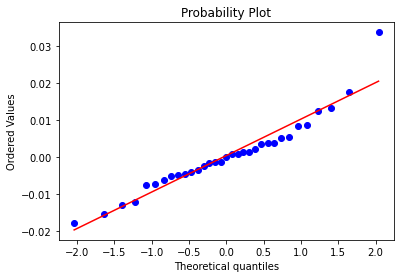

In [97]:
stats.probplot(log_returns, dist='norm', plot=pylab)
print('Q-Q Plot')

In [98]:
log_returns.plot(kind='box').update_layout(autosize = False, width=500, height=300)

## Kolmogorov Smirnov Test

The Kolmogorov Smirnov test computes the distances between the empirical distribution and the theoretical distribution and defines the test statistic as the supremum of the set of those distances.

The Test Statistic of the KS Test is the Kolmogorov Smirnov Statistic, which follows a Kolmogorov distribution if the null hypothesis is true. If the observed data perfectly follow a normal distribution, the value of the KS statistic will be 0. The P-Value is used to decide whether the difference is large enough to reject the null hypothesis.

The advantage of this is that the same approach can be used for comparing any distribution, not necessary the normal distribution only.

In [99]:
ks_stat, p_value = stats.kstest(log_returns, 'norm')
print(ks_stat, p_value)
if p_value > 0.05:
    print('Probability Guassian')
else:
    print('Probability NOT Guassian')

0.49288585018337094 6.366318555958254e-08
Probability NOT Guassian


## Shapiro Wilk Test

The Shapiro Wilk test is the most powerful test when testing for a normal distribution. It has been developed specifically for the normal distribution and it cannot be used for testing against other distributions like for example the KS test.

In [100]:
sw_stat, p_value = stats.shapiro(log_returns)
print(sw_stat, p_value)
if p_value > 0.05:
    print('Probability Guassian')
else:
    print('Probability NOT Guassian')

0.934701144695282 0.04771857336163521
Probability NOT Guassian
